In [1]:
import numpy as np
import matplotlib.pyplot as plt
#import SIMION_utils as su
import importlib
import pandas as pd

In [104]:
base = 'D:/Simulation Data/SIMION/240820/'
files = ['run1', 'run2', 'run3', 'run4', 'run5', 'run6', 'run7', 'run8', 'run9']
ftype = '.csv'

In [113]:
effs = []
errs = []
for file in files:
    filename = base+file+ftype
    data = pd.read_csv(filename, names=list('abcdefghij')) 
    if file == 'run30000':
        da = np.array([i for i in data.values[34:, 2:5] if i[0] != 'stopped after max_time' ])[::2].astype('float')[:, :]
        da2 = np.array([i for i in data.values[35:, 2:5] if i[0] != 'stopped after max_time' ])[::2].astype('float')[:, :]
    else:
        da = np.array([i for i in data.values[29:, 2:5] if i[0] != 'stopped after max_time' ])[::2].astype('float')[:, :]
        da2 = np.array([i for i in data.values[30:, 2:5] if i[0] != 'stopped after max_time' ])[::2].astype('float')[:, :]
    i = 0
    j = 0
    indices = []
    indices2 = []
    effs_tmp = []
    for l in range(100):
        da_tmp = da[l*10:(l+1)*10]
        for n, k in enumerate(da_tmp):
            if np.sqrt((k[0]-1.5)**2 + (k[1]-4)**2 + k[2]**2)<0.1:
                i+=1
                if n != 0:
                    indices.append(n)
            else:
                j +=1
                if n != 0:
                    indices2.append(n)
        eff = i/(i+j)
        effs_tmp.append(eff)
    effs.append(np.mean(effs_tmp))
    errs.append(np.std(effs_tmp)/np.sqrt(1))

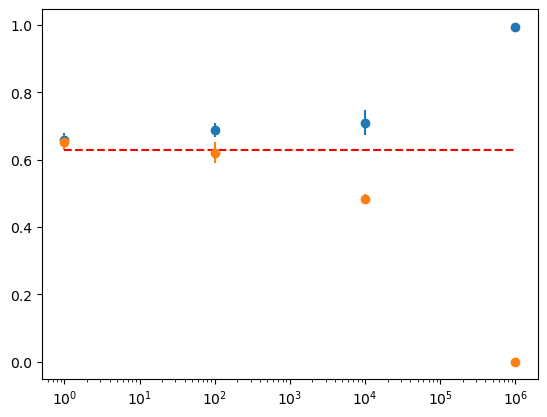

In [114]:
charge = np.array([1, 100, 10000, 1000000])
plt.errorbar(charge, [effs[0]]+effs[2:5], [errs[0]] + errs[2:5], marker = 'o', linestyle = 'None')
plt.errorbar(charge[:], effs[5:], errs[5:], marker = 'o', linestyle = 'None')
plt.plot([1, 10**6], [effs[1], effs[1]], 'r--')
plt.xscale('log')

In [103]:
1/4/np.pi/8.854/10**(-12)*10*1.6*10**(-19)/(10**(-6))

0.01438038790078115

In [42]:
[1,2,3] + [4]

[1, 2, 3, 4]

In [98]:
base = 'D:/Simulation Data/SIMION/240820/'
files = ['run12']
ftype = '.csv'

In [99]:

for file in files:
    filename = base+file+ftype
    data = pd.read_csv(filename, names=list('abcdefghij')) 

C:\Users\thoma\AppData\Local\Temp\ipykernel_10928\2345352181.py:3: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,9) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(filename, names=list('abcdefghij'))


In [100]:
i = 1
r = []
r_tmp = []
for j in data.values[29:]:
    j = j.astype('float')
    if int(j[0]) == i:
        r_tmp.append(np.sqrt((j[2]-1.5)**2+(j[3]-4)**2+j[4]**2))
    else:
        r.append(r_tmp)
        r_tmp = []
        i = i+1

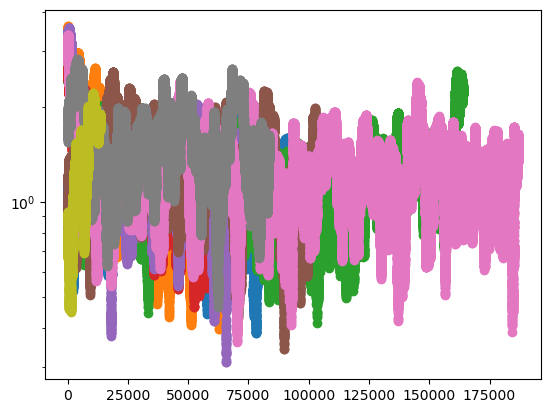

In [101]:
for rl in r:
    plt.plot(rl, 'o')
plt.yscale('log')

In [139]:
base = 'D:/Simulation Data/SIMION/240820/'
files = ['run13', 'run14', 'run15', 'run16', 'run17']
ftype = '.csv'

In [146]:
effs = []
errs = []
times = []
t_errs = []
for file in files:
    filename = base+file+ftype
    data = pd.read_csv(filename, names=list('abcdefghij')) 
    if file == 'run30000':
        da = np.array([i for i in data.values[34:, 2:5] if i[0] != 'stopped after max_time' ])[::2].astype('float')[:, :]
        da2 = np.array([i for i in data.values[35:, 2:5] if i[0] != 'stopped after max_time' ])[::2].astype('float')[:, :]
    else:
        da = np.array([i for i in data.values[29:, 1:5] if i[0] != 'stopped after max_time' ])[::2].astype('float')[:, :]
        da2 = np.array([i for i in data.values[30:, 1:5] if i[0] != 'stopped after max_time' ])[::2].astype('float')[:, :]
    i = 0
    j = 0
    indices = []
    indices2 = []
    effs_tmp = []
    time = []
    for l in range(100):
        da_tmp = da[l*10:(l+1)*10]
        for n, k in enumerate(da_tmp):
            if np.sqrt((k[1]-1)**2 + (k[2]-1)**2)<0.01:
                i+=1
                time.append(k[0])
                if n != 0:
                    indices.append(n)
            else:
                j +=1
                if n != 0:
                    indices2.append(n)
        eff = i/(i+j)
        effs_tmp.append(eff)
    effs.append(np.mean(effs_tmp))
    errs.append(np.std(effs_tmp)/np.sqrt(1))
    times.append(np.mean(time))
    t_errs.append(np.std(time))

In [147]:
print(times)
print(t_errs)

[21.349631134944612, 20.552977368473897, 4.206622597, 22.59539229045226, 75.98637164712643]
[20.333175422363773, 19.33934887579739, 3.1419662398173696, 23.195250724720584, 70.099319594081]


<ErrorbarContainer object of 3 artists>

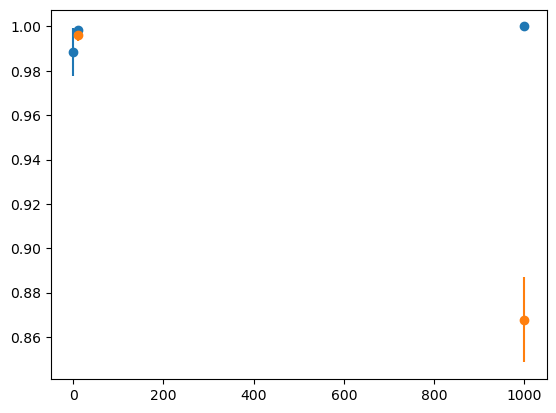

In [148]:
charge = np.array([0, 10, 1000])
charge2 = np.array([10, 1000])
plt.errorbar(charge, effs[:3], errs[:3], marker = 'o', linestyle = 'None')
plt.errorbar(charge2, effs[3:], errs[3:], marker = 'o', linestyle = 'None')
#plt.errorbar(charge[:], effs[5:], errs[5:], marker = 'o', linestyle = 'None')
#plt.plot([1, 10**6], [effs[1], effs[1]], 'r--')
#plt.xscale('log')